<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# RNN Exemple pour l'onde sinusoïdale

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Données

Utilisons Numpy pour créer une simple onde sinusoïdale.

In [ ]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [ ]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [ ]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Transformons cela en un DataFrame

In [ ]:
df = pd.DataFrame(data=y,index=x,columns=['Sinus'])

In [ ]:
df

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Répartition Train / Test

Note ! C'est très différent de notre méthodologie habituelle de répartition Entraînement / Test !

In [ ]:
len(df)

501

In [ ]:
test_percent = 0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_ind = int(len(df) - test_point)

In [ ]:
test_ind

451

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [ ]:
test

,Sinus
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Mise à l'échelle des données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Si warning, ignorez le, cest juste une conversion en float
# Adapter uniquement aux données d'entraînement, sinon nous trichons en supposant des informations sur les données test
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Générateur de séries temporelles

Cette classe examine une série de points de données recueillis à
des intervalles égaux, ainsi que des paramètres de séries temporelles tels stride, length , etc., afin de produire des lots pour
l'entraînement/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# définir un générateur
length = 2 # Longueur des séquences de sortie (en nombre de pas temporel)
batch_size = 1 # Nombre d'échantillons de séries temporelles dans chaque batch (lot)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [ ]:
len(scaled_train)

451

In [ ]:
len(generator) # n_input = 2

449

In [ ]:
# À quoi ressemble le premier batch ?
X,y = generator[0]

In [ ]:
print(f"Compte tenu du tableau suivant : \n{X.flatten()}")
print(f'Cela prédit ce y : \n {y}')

Compte tenu du tableau suivant : 
[0.49999912 0.54991622]
Cela prédit ce y : 
 [[0.59933458]]


In [ ]:
# Redéfinissons pour obtenir 10 pas en arrière et prédisons ensuite le prochain pas
length = 10 # Longueur des séquences de sortie (en nombre de pas temporel)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
# À quoi ressemble le premier batch ?
X,y = generator[0]

In [ ]:
print(f"Compte tenu du tableau suivant: \n{X.flatten()}")
print(f'Cela prédit ce y : \n {y}')

Compte tenu du tableau suivant: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Cela prédit ce y : 
 [[0.92073798]]


In [ ]:
length = 50 # Longueur des séquences de sortie (en nombre de pas temporel)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Vous allez maintenant pouvoir modifier la longueur de manière à ce qu'elle ait un sens pour votre série temporelle !

## Créer le modèle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [ ]:
# Nous n'utilisons qu'une seule feature dans notre série temporelle
n_features = 1

In [ ]:
# définir le modèle
model = Sequential()

# Couche simple RNN
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Prédiction finale
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ajustement du modèle
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 2s 6ms/step - loss: 0.0072
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 6.2449e-04
Epoch 3/5
401/401 [==============================] - 2s 6ms/step - loss: 6.7660e-05
Epoch 4/5
401/401 [==============================] - 2s 6ms/step - loss: 1.0443e-04
Epoch 5/5
401/401 [==============================] - 2s 6ms/step - loss: 5.5066e-04


In [ ]:
model.history.history.keys()

dict_keys(['loss'])

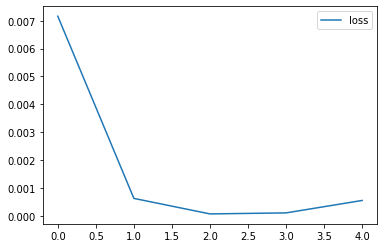

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Évaluer sur les données de test

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.9499817]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

Mettons maintenant cette logique dans une boucle for pour prédire l'avenir pour toute la gamme de test.

----

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
current_batch.shape

(1, 50, 1)

In [ ]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [ ]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # obtenir la prédiction avec 1 timestamp d'avance ([0] pour ne saisir que le nombre au lieu de [array])
    current_pred = model.predict(current_batch)[0]
    
    # stocker la prédiction
    test_predictions.append(current_pred) 
    
    # mise à jour du batch pour inclure maintenant la prédiction et supprimer la première valeur
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.9499817], dtype=float32),
 array([0.96897453], dtype=float32),
 array([0.9833301], dtype=float32),
 array([0.9919662], dtype=float32),
 array([0.9954858], dtype=float32),
 array([0.99331355], dtype=float32),
 array([0.9857492], dtype=float32),
 array([0.9730704], dtype=float32),
 array([0.9552291], dtype=float32),
 array([0.93273294], dtype=float32),
 array([0.90581685], dtype=float32),
 array([0.8747293], dtype=float32),
 array([0.84034723], dtype=float32),
 array([0.8021955], dtype=float32),
 array([0.7616093], dtype=float32),
 array([0.7179921], dtype=float32),
 array([0.67247814], dtype=float32),
 array([0.624895], dtype=float32),
 array([0.575707], dtype=float32),
 array([0.52544004], dtype=float32),
 array([0.47409633], dtype=float32),
 array([0.42247182], dtype=float32),
 array([0.37088963], dtype=float32),
 array([0.3197414], dtype=float32),
 array([0.270258], dtype=float32),
 array([0.22216563], dtype=float32),
 array([0.17732261], dtype=float32),
 array([0.13523978]

In [ ]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Transformations inverses et Comparaison

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[ 0.89995792],
       [ 0.9379433 ],
       [ 0.96665415],
       [ 0.98392625],
       [ 0.99096538],
       [ 0.98662095],
       [ 0.97149234],
       [ 0.94613494],
       [ 0.91045267],
       [ 0.8654607 ],
       [ 0.81162896],
       [ 0.7494543 ],
       [ 0.68069077],
       [ 0.6043879 ],
       [ 0.5232162 ],
       [ 0.43598252],
       [ 0.34495528],
       [ 0.24978972],
       [ 0.15141459],
       [ 0.05088143],
       [-0.05180516],
       [-0.15505334],
       [-0.25821689],
       [-0.36051254],
       [-0.45947853],
       [-0.55566251],
       [-0.64534783],
       [-0.72951282],
       [-0.8053053 ],
       [-0.87238061],
       [-0.93054086],
       [-0.97762475],
       [-1.01516855],
       [-1.04120048],
       [-1.05566549],
       [-1.05992459],
       [-1.05018716],
       [-1.03137471],
       [-0.99840275],
       [-0.95553089],
       [-0.90184961],
       [-0.83625451],
       [-0.76431651],
       [-0.68074421],
       [-0.59260857],
       [-0

In [ ]:
test

,Sinus
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
# Ignorez le warning
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,Sinus,Predictions
45.1,0.899097,0.899958
45.2,0.938307,0.937943
45.3,0.968142,0.966654
45.4,0.988304,0.983926
45.5,0.998591,0.990965
45.6,0.998900,0.986621
45.7,0.989229,0.971492
45.8,0.969673,0.946135
45.9,0.940429,0.910453
46.0,0.901788,0.865461


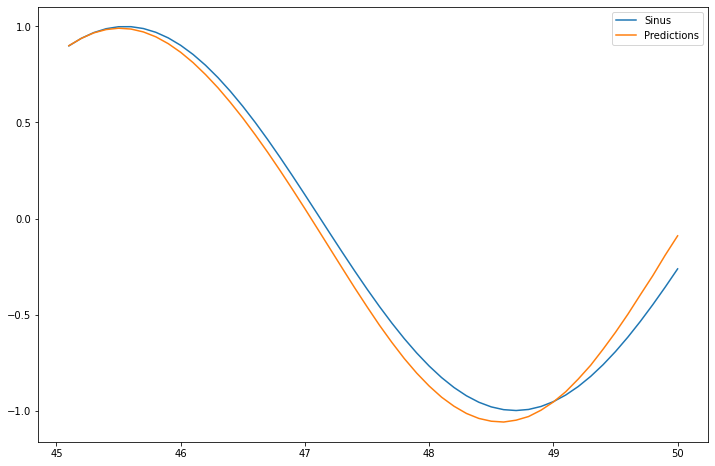

In [ ]:
test.plot(figsize=(12,8))

## Ajout d'un Early Stopping et d'un Générateur de Validation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

## LSTMS

In [ ]:
# définir le modèle
model = Sequential()

# Couche simple RNN
model.add(LSTM(50,input_shape=(length, n_features)))

# Prédiction finale
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 6s 14ms/step - loss: 0.0155 - val_loss: 1.1509e-04
Epoch 2/20
402/402 [==============================] - 5s 13ms/step - loss: 6.0112e-05 - val_loss: 2.7480e-05
Epoch 3/20
402/402 [==============================] - 5s 13ms/step - loss: 4.8674e-05 - val_loss: 1.0009e-06
Epoch 4/20
402/402 [==============================] - 5s 13ms/step - loss: 7.9372e-05 - val_loss: 2.7984e-05
Epoch 5/20
402/402 [==============================] - 5s 13ms/step - loss: 5.8024e-04 - val_loss: 1.7160e-04


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # obtenir la prédiction avec 1 timestamp d'avance ([0] pour ne saisir que le nombre au lieu de [array])
    current_pred = model.predict(current_batch)[0]
    
    # stocker la prédiction
    test_predictions.append(current_pred) 
    
    # mise à jour du batch pour inclure maintenant la prédiction et supprimer la première valeur
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


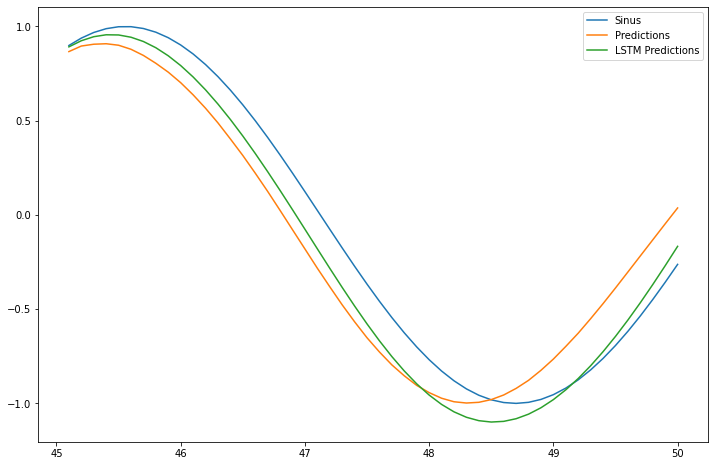

In [ ]:
# Ignorez le warning
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

## Prévisions

Prévisions dans un intervalle inconnu. Nous devrions d'abord utiliser toutes nos données, puisque nous faisons maintenant des prévisions !

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 50 # Longueur des séquences de sortie (en nombre de pas temporel)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 6s 14ms/step - loss: 0.0121
Epoch 2/6
451/451 [==============================] - 6s 13ms/step - loss: 6.4445e-04
Epoch 3/6
451/451 [==============================] - 6s 13ms/step - loss: 5.5877e-05
Epoch 4/6
451/451 [==============================] - 6s 13ms/step - loss: 2.8606e-04
Epoch 5/6
451/451 [==============================] - 6s 13ms/step - loss: 8.5879e-05
Epoch 6/6
451/451 [==============================] - 6s 13ms/step - loss: 4.3137e-05


In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # obtenir la prédiction avec 1 timestamp d'avance ([0] pour ne saisir que le nombre au lieu de [array])
    current_pred = model.predict(current_batch)[0]
    
    # stocker la prédiction
    forecast.append(current_pred) 
    
    # mise à jour du batch pour inclure maintenant la prédiction et supprimer la première valeur
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = full_scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[-0.17554293],
       [-0.07708078],
       [ 0.02233819],
       [ 0.12182267],
       [ 0.22045529],
       [ 0.31727832],
       [ 0.4113182 ],
       [ 0.50160635],
       [ 0.58719937],
       [ 0.66719495],
       [ 0.740749  ],
       [ 0.80708605],
       [ 0.86551399],
       [ 0.91542962],
       [ 0.95633023],
       [ 0.9878178 ],
       [ 1.0096067 ],
       [ 1.02152491],
       [ 1.0235176 ],
       [ 1.0156396 ],
       [ 0.99805339],
       [ 0.97101622],
       [ 0.93487524],
       [ 0.89004837],
       [ 0.83702117],
       [ 0.77633078],
       [ 0.70856644],
       [ 0.63435735],
       [ 0.55437571],
       [ 0.46933296],
       [ 0.37998214],
       [ 0.28711635],
       [ 0.19156956],
       [ 0.09420997],
       [-0.00406103],
       [-0.10231933],
       [-0.19962594],
       [-0.2950382 ],
       [-0.38761784],
       [-0.47644187],
       [-0.56061011],
       [-0.63925122],
       [-0.7115323 ],
       [-0.7766677 ],
       [-0.83393242],
       [-0

In [ ]:
df

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
len(forecast)

50

In [ ]:
50*0.1

5.0

In [ ]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [ ]:
len(forecast_index)

50

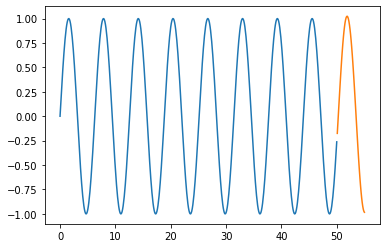

In [ ]:
plt.plot(df.index,df['Sinus'])
plt.plot(forecast_index,forecast)